In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import accuracy

In [3]:
path = Path('data/asl')

In [4]:
path1 = Path('data/asl/asl_alphabet_train/asl_alphabet_train')

In [5]:
path1.ls()

[PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/E'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/V'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/N'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/I'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/K'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/space'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/P'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/Y'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/Z'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/U'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/X'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/D'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/B'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/A'),
 PosixPath('data/asl/asl_alphabet_train/asl_alphabet_train/H'),
 PosixPath('data/asl/asl_alphabet_tr

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path1, train='.', valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=200, bs=64).normalize(imagenet_stats)

In [7]:
data.classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

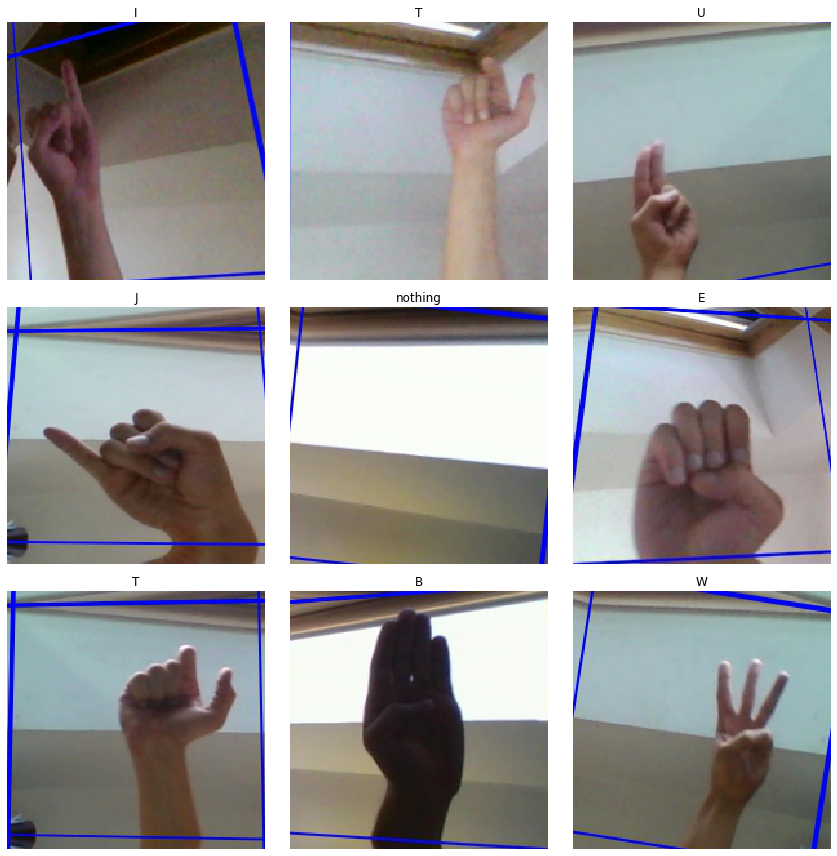

In [8]:
data.show_batch(rows=3, size=(7,9))

In [9]:
data.c, len(data.train_ds), len(data.valid_ds)

(29, 69600, 17400)

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


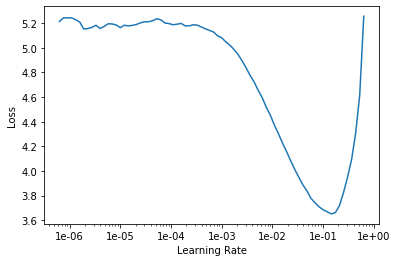

In [11]:
learn.lr_find()
learn.recorder.plot()

In [24]:
lr=1e-2

In [17]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,accuracy,time
0,0.440112,0.145503,0.955115,02:15
1,0.133068,0.032896,0.988793,02:16
2,0.066154,0.017659,0.995115,02:15
3,0.050055,0.005558,0.997989,02:15
4,0.032775,0.004180,0.998736,02:15
5,0.018318,0.005410,0.998506,02:14
6,0.012987,0.001243,0.999425,02:14
7,0.012165,0.001107,0.999713,02:14
8,0.007104,0.000601,0.999828,02:14
9,0.006930,0.000430,0.999770,02:14


In [18]:
learn.save('stage-1')

In [13]:
learn.unfreeze()

In [19]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


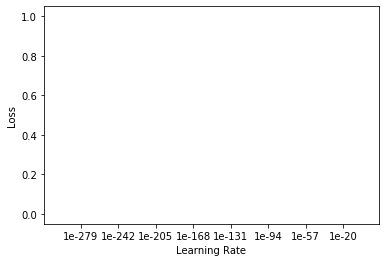

In [20]:
learn.recorder.plot()

In [21]:
learn.export()